# Full Analysis
This file runs all analyses associated with project group 13's dataset. To clarify, the research questions are as follows:

Rhys: How does substance type correlate to event type? (i.e., how do opioids and stimulants compare regarding event types?)

Shalini:(1)Which regions of Canada have experienced the most opioid related deaths in 2020? (2)Has the opioid crisis been getting better or worse in canada? 

In [39]:
# importing libraries and functions
#to ignore the pandas library error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#paths
import os
import sys
sys.path.append('..')

#our function & profile reports
from pandas_profiling import ProfileReport
from scripts import project_functions_v2 as pf 

## Rhys' Analysis
Substance use and event types:

In [40]:
#load dataset and check head
df_s = pf.load_process_rdata('../data/raw/SubstanceHarmsData.csv')
#print(df_s.head())

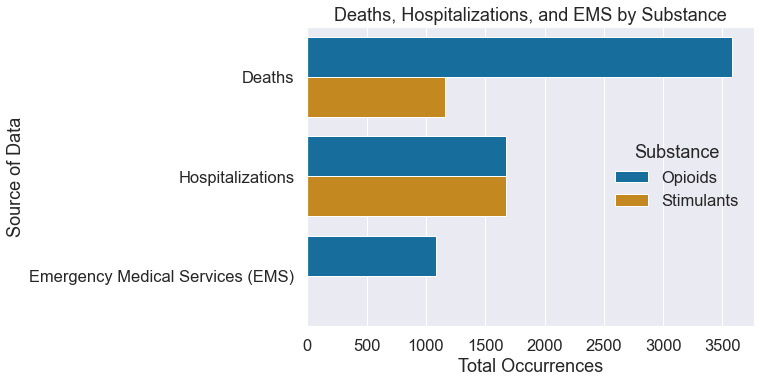

In [41]:
#Comparing substance vs. TOTAL hospitalizations and deaths
#note: for substance, 1 = Opioids, 2 = stimulants
# EMS data is unavailable for stimulants

plt.figure()
source_counts = sns.countplot(data=df_s,y="Source",hue="Substance",palette="colorblind")
source_counts.set_title("Deaths, Hospitalizations, and EMS by Substance")
source_counts.set_xlabel("Total Occurrences")
source_counts.set_ylabel("Source of Data")
source_counts.legend(title="Substance",labels=["Opioids","Stimulants"])

plt.show()

['Total apparent substance deaths' 'Accidental apparent substance deaths'
 'Suicide apparent opioid toxicity deaths'
 'Total substance-related poisoning hospitalisations'
 'Accidental substance-related poisoning hospitalisations'
 'Intentional substance-related poisoning hospitalisations'
 'EMS responses to suspected opioid-related overdoses']


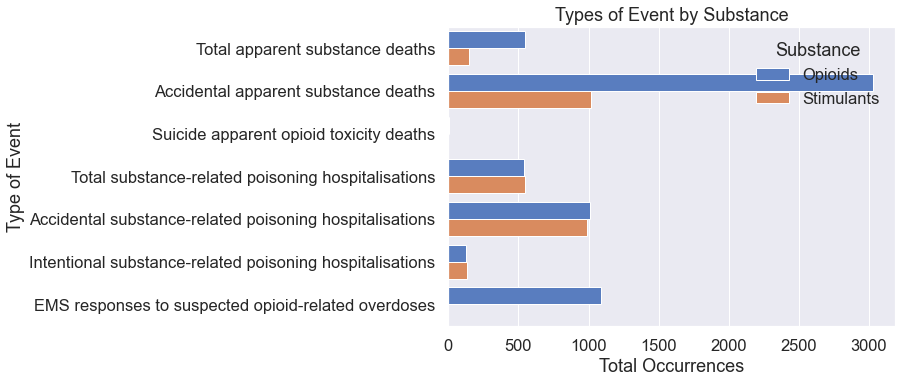

In [43]:
#comparing all event types by substance
#combining event types (total/accidental/intentional deaths/hospitalisations)
df_e = df_s
df_e["Grouped Events"] = df_e["Type of Event"]
df_e["Grouped Events"] = df_e["Type of Event"].replace(to_replace=["Total apparent opioid toxicity deaths","Total apparent stimulant toxicity deaths"],value="Total apparent substance deaths",inplace=True)
df_e["Grouped Events"] = df_e["Type of Event"].replace(to_replace=["Accidental apparent opioid toxicity deaths","Accidental apparent stimulant toxicity deaths"],value="Accidental apparent substance deaths",inplace=True)
df_e["Grouped Events"] = df_e["Type of Event"].replace(to_replace=["Total opioid-related poisoning hospitalizations","Total stimulant-related poisoning hospitalizations"],value="Total substance-related poisoning hospitalisations",inplace=True)
df_e["Grouped Events"] = df_e["Type of Event"].replace(to_replace=["Accidental opioid-related poisoning hospitalizations","Accidental stimulant-related poisoning hospitalizations"],value="Accidental substance-related poisoning hospitalisations",inplace=True)
df_e["Grouped Events"] = df_e["Type of Event"].replace(to_replace=["Intentional opioid-related poisoning hospitalizations","Intentional stimulant-related poisoning hospitalizations"],value="Intentional substance-related poisoning hospitalisations",inplace=True)

print(df_e["Type of Event"].unique())

# plotting
plt.figure()
ev_plt = sns.countplot(data=df_e,y="Type of Event",hue="Substance",palette="muted")
ev_plt.set_title("Types of Event by Substance")
ev_plt.set_xlabel("Total Occurrences")
ev_plt.set_ylabel("Type of Event")
ev_plt.legend(title="Substance",labels=["Opioids","Stimulants"])

plt.show()

### Exporting Data
We can export the data to a .csv file (to be used in Tableau later)

In [17]:
df_e.to_csv("../data/processed/Events_Substances.csv",sep=",")

### Comments Regarding Substance Use and Event Types
Two groupings were used to provide information regarding the correlation between substances and medical events. First, we see summaries of deaths, hospitalizations, and EMS responses by the type of substance. From this graph (which has no information for stimulant EMS responses), we can see that despite comparable levels of hospitalizations, opioids account for more than double the amount of deaths recorded.\
\
From the second chart, we can see the consistency regarding substance use and death. However, from this chart we can see that the vast majority of accidental apparent substance deaths occur with opioid usage. From this, we can tailor any future analyses and perhaps explore the role of opioids in accidental poisonings more closely. 

## Shalini's Analysis


In [6]:
# import all required module
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# import loading of data method
from scripts import project_functions_v2

# Load and proces data
df = project_functions_v2.load_and_process("https://health-infobase.canada.ca/src/doc/SubstanceHarmsData.csv")
#display(df.head())

# convert "Value" column into integers and assign it to a new column
df['Value_int'] = df['Value'].astype(int)

# print new bank lines
print("\n\n")

**Research Question 1**: Which regions of Canada have experienced the most opioid related deaths in 2020?

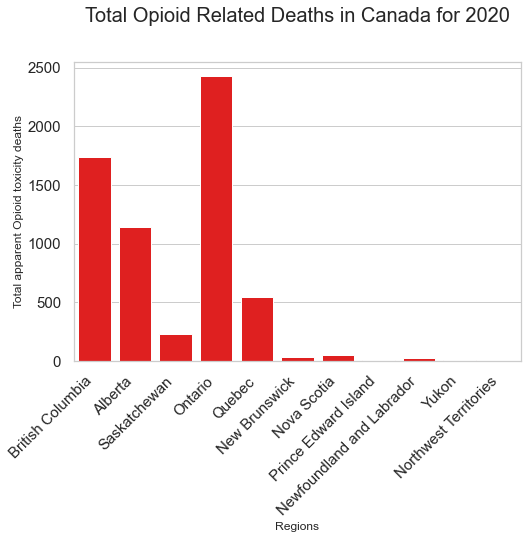

In [7]:
#graph 1
df1 = df.groupby(["Region","Year_Quarter"]).filter(lambda x: (x["Year_Quarter"] == '2020').any())
df1 = df1.reset_index()
#display(df1.head())

sns.set_theme(style="whitegrid", font_scale=1.5 )
sns.barplot(data = df1,x = 'Region', y = 'Value_int', color = 'red')
plt.xticks(fontsize = 15, rotation=45, ha='right')
plt.yticks(fontsize = 15)
plt.xlabel('Regions', size=12)
plt.ylabel('Total apparent Opioid toxicity deaths', size=12)
plt.title('Total Opioid Related Deaths in Canada for 2020', size=20, pad=40)
plt.show()

# print new bank lines
print("\n\n")



**RQ1 Conclusion**:
- A bar graph was created to visualize the relationship between region and death count. Based on bargraph 1, Ontario seems to have experienced the most opioid related deaths in 2020 followed by British Columbia and Alberta respectively. The high percentage of deaths primarily occurring in those 3 regions indicates that government efforts need to be amped up drastically in those areas. Overall, this information and visualization aids in providing us with a nation-wide picture of the opioid crisis in 2020. 


**Research Question 2**: Has the opioid crisis been getting better or worse in canada? 

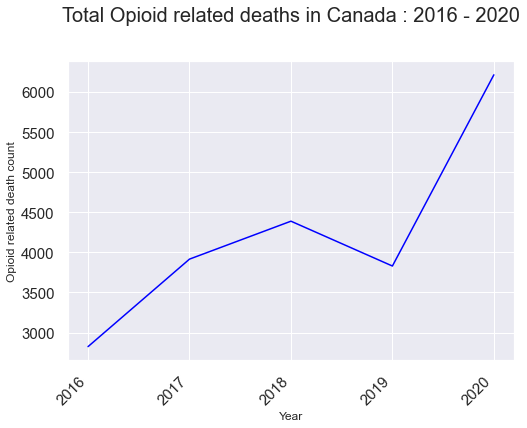

In [8]:
# Graph 2
df2 = df.groupby('Year_Quarter').Value_int.sum()
df2 = df2.reset_index()
#display(df2.head())

sns.set_theme(style="darkgrid", font_scale=1.5 )
sns.lineplot(data = df2,x = 'Year_Quarter', y = 'Value_int', color = 'blue')
plt.xticks(fontsize = 15, rotation=45, ha='right')
plt.yticks(fontsize = 15)
plt.xlabel('Year', size=12)
plt.ylabel('Opioid related death count', size=12)
plt.title('Total Opioid related deaths in Canada : 2016 - 2020', size=20, pad=40)
plt.show()

**RQ2 Conclusion**:
- A line graph of the death count(nationwide) by year was plotted to help examine whether the opioid crisis has been getting better or worse in canada. Overall, from the years 2016-2020, we can see an increasing trend in the total opioid related deaths in Canada; thus, we can conclude that the opioid crisis has been getting worse in Canada. This information can be used by the government to perhaps assess current plans set in place and realize they are not sufficient in dealnig with an opioid crisis of this scale. From the graph, we can see that the greatest increase in deaths occured between the years 2019-2020; the effects of the covid-19 pandemic could possibly explain these surge in deaths from 2019 to 2020, however, more analysis and research will be needed to draw definite conclusions. 
 